In [235]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()

In [4]:
X = boston.data
y = boston.target

print(X)
print(y)

### === Task ===

1. Implement early stopping in which if the absolute difference between old loss and new loss does not exceed certain threshold, we abort the learning.

2. Implement options for stochastic gradient descent in which we use only one sample for training.  Make sure that sample does not repeat unless all samples are read at least once already.

3. Add options for mini-batch gradient descent.

3. Put everything into class.

In [6]:
#Scale the the data and perfrom train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)

In [11]:
#insert 1 on the first column as the intercept variable on X_train & X_test
X_train = np.insert(X_train,0,1, axis=1 )
X_test = np.insert(X_test,0,1, axis=1)

## CREATE GRADIENT DESCENT FUNCTION IN GENERAL

In [187]:
def predict(X, theta):
    yhat = np.dot(X,theta)
    return yhat

def mse_cal(yhat, ytrue):
    error = yhat - ytrue
    mse = np.sum(error **2) / len(yhat)
    return mse

In [188]:
def gradient_descent(X, y, iter_max, alpha=0.0001):
    mse_record = np.zeros(iter_max)
    theta = np.zeros(X.shape[1])
    
    
    for i in np.arange(iter_max):
    
        predicted = np.dot(X,theta)
        error = predicted - y
        mse = np.sum(error**2) / len(X)
        mse_record[i] = mse
        
        gradient = np.dot(X.T, error)
        theta = theta - (alpha * gradient)
    
    return (mse_record, theta)

In [191]:
#test the fist prediction with the test set
mse_result, theta_ =gradient_descent(X_train, y_train, iter_max = 100)

yhat = predict(X_test, theta_)
mse_cal(yhat, y_test)

22.35086187739023

## 1st: Early stop when the diff of current and previous loss < threshold

In [193]:
#early stop using while loop
def early_stop_gradient_descent(X, y, alpha=0.0001):
    mse_record = [0,1]
    theta = np.zeros(X.shape[1])
    threshold = 0.0001
    count = 0
    
    while np.abs(mse_record[-1] - mse_record[-2]) > threshold:
        predicted = np.dot(X,theta)
        error = predicted - y
        mse = np.sum(error**2) / len(X)
        mse_record.append(mse)
        gradient = np.dot(X.T, error)
        theta = theta - (alpha * gradient)
        count +=1
        
    else:
        return (mse_record,count, theta)

In [205]:
mse_result, iter_count, theta_ = early_stop_gradient_descent(X_train, y_train, alpha=0.0001)

#and the predict
#with the early stop, we can see that after iterating 837 times, the delta
print(iter_count)

print(mse_result[iter_count])
print(mse_result[iter_count - 1])

print(f"the delta after {iter_count} iterations: {np.abs(mse_result[iter_count] - mse_result[iter_count - 1])}")

yhat = predict(X_test, theta_)
mse_cal(yhat, y_test)

837
22.03847448568686
22.038574558433083
the delta after 837 iterations: 0.00010007274622481077


23.595944383579326

## 2nd: Now use stochastic gradient descent, only random index will be used for evaluation

In [212]:
#stochastic
def stochastic_gradient_descent(X, y, max_iter,alpha=0.0001):
    mse_record = [0,1]
    theta = np.zeros(X.shape[1])
    threshold = 0.0001
    
    #generate all possible index in X 
    all_index = np.arange(X.shape[0])
    

    for i in np.arange(max_iter):
        if len(all_index) != 0:
            
            #randomize the index for evaluation
            random_index = np.random.randint(len(all_index))


            predicted = np.dot(X[random_index],theta)
            error = predicted - y[random_index]
            mse = np.sum(error**2) / 1
            mse_record.append(mse)
            gradient = np.dot(X[random_index].T, error)
            theta = theta - (alpha * gradient)
            
            
            #drop the index that has been used so that it will NOT be used again unless the remaining indexes are used
            all_index = np.delete(all_index, random_index)
            
        else:
            all_index = np.arange(X.shape[0])
    
    
        
    
        
    else:
        return theta

In [213]:
# test the model
theta_ = stochastic_gradient_descent(X_train, y_train, max_iter = 10000)

yhat = predict(X_test, theta_)
mse_cal(yhat, y_test)

#we can see that MSE of stachastic method yields worse result than batch method because of higher MSE

115.39176526723266

## 3rd: Use minibatch method

In [214]:
#mini batch
def minibatch_gradient_descent(X, y, max_iter,alpha=0.0001):
    mse_record = [0,1]
    theta = np.zeros(X.shape[1])
    threshold = 0.0001
    
    all_index = np.arange(X.shape[0])
    
    #create the number of items to be add when running each epoch
    batchsize = 50
    

    for i in np.arange(max_iter):
        if len(all_index) != 0:
        
            random_index = np.random.randint(len(all_index))


            predicted = np.dot(X[random_index: random_index + batchsize],theta)
            error = predicted - y[random_index: random_index + batchsize]
            mse = np.sum(error**2) / batchsize
            mse_record.append(mse)
            gradient = np.dot(X[random_index: random_index + batchsize].T, error)
            theta = theta - (alpha * gradient)

            all_index = np.delete(all_index, random_index)
            
        else:
            all_index = np.arange(X.shape[0])
    
    
        
    
        
    else:
        return (mse_record, theta)

In [216]:
# test the model
mse_result, theta_ = minibatch_gradient_descent(X_train, y_train, max_iter = 10000)

yhat = predict(X_test, theta_)
mse_cal(yhat, y_test)


23.345876543267693

## Summary of MSE of different gradient descent methods
MSE of batch gradient descent without early stop : 22.350

MSE of batch gradient descent with early stop after 837 iterations : 23.595

MSE of stochastic gradient descent : 115.39

MSE of minibatch(of 50 items) gradient descent : 23.458

## 4th: Put everything to gether as a class of LinearRegression()

In [338]:
class LinearRegression:
    
    def __init__(self, alpha= 0.0001, max_iter = 10000, threshold = 0.0001, method = 'batch'):
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.threshold = threshold
        self.theta = 0
        self.mse_record = 0
        self.count = 0
    
    def predict(self, X, theta):
        yhat = np.dot(X,theta)
        return yhat
    
    
    def mse_cal(self, yhat, ytrue):
        error = yhat - ytrue
        mse = np.sum(error **2)/ len(yhat)
        return mse
    
    
    def fit(self, X, y):
        if self.method == 'batch':
            mse_record = [0,1]
            theta = np.zeros(X.shape[1])
            
            for i in np.arange(self.max_iter):
                count = 0
                
                
                #for early stop
                while np.abs(mse_record[-1] - mse_record[-2]) > self.threshold:
                    predicted = np.dot(X,theta)
                    error = predicted - y
                    mse = np.sum(error**2) / len(X)
                    mse_record.append(mse)
                    gradient = np.dot(X.T, error)
                    theta = theta - (self.alpha * gradient)
                    count +=1
                    
                    self.theta = theta
                    self.mse_record = mse_record
                    self.count = count
                    
                else:
                    break
            
            return (self.mse_record, self.count, self.theta)
        
        
        
        
        elif self.method == 'stochastic':
            mse_record = [0,1]
            theta = np.zeros(X.shape[1])
            all_index = np.arange(X.shape[0])
            count = 0
    

            for i in np.arange(self.max_iter):
                if len(all_index) != 0:
                    
                    
                    #for early stop
                    while np.abs(mse_record[-1] - mse_record[-2]) > self.threshold:
                        random_index = np.random.randint(len(all_index))
                        predicted = np.dot(X[random_index],theta)
                        error = predicted - y[random_index]
                        mse = np.sum(error**2) / 1
                        mse_record.append(mse)
                        gradient = np.dot(X[random_index].T, error)
                        theta = theta - (self.alpha * gradient)
                        count +=1
                        self.theta = theta
                        self.mse_record = mse_record
                        self.count = count
                        
                        

                    else:
                        break

            return (self.mse_record, self.count, self.theta)
        
        
        
        elif self.method == 'minibatch':
            mse_record = [0,1]
            theta = np.zeros(X.shape[1])
            all_index = np.arange(X.shape[0])
            batchsize = 50
            count = 0
    

            for i in np.arange(self.max_iter):
                if len(all_index) != 0:
                    random_index = np.random.randint(len(all_index))
                    
                    #for early stop
                    while np.abs(mse_record[-1] - mse_record[-2]) > self.threshold:
                        predicted = np.dot(X[random_index: random_index+ batchsize],theta)
                        error = predicted - y[random_index : random_index+ batchsize]
                        mse = np.sum(error**2) / 1
                        mse_record.append(mse)
                        gradient = np.dot(X[random_index: random_index+ batchsize].T, error)
                        theta = theta - (self.alpha * gradient)
                        count +=1
                        self.theta = theta
                        self.mse_record = mse_record
                        self.count = count

                    else:
                        break

            return (self.mse_record, self.count, self.theta)
        
        
        
        
        

In [224]:
model1 = LinearRegression(method= 'batch')

In [289]:
model1.fit(X_train, y_train)
yhat1 = model1.predict(X_test, model1.theta)
mse1 = model1.mse_cal(yhat1, y_test)
print(mse1)

23.595944383579326


In [339]:
model2 = LinearRegression(method= 'stochastic')

In [341]:
model2.fit(X_train, y_train)
yhat2 = model2.predict(X_test, model2.theta)
mse2 = model2.mse_cal(yhat2, y_test)
print(mse2)

28.26241116550102


In [329]:
model3 = LinearRegression(method= 'minibatch')

In [330]:
model3.fit(X_train, y_train)
yhat3 = model3.predict(X_test, model3.theta)
mse3 = model3.mse_cal(yhat3, y_test)
print(mse3)

27.588651656445144


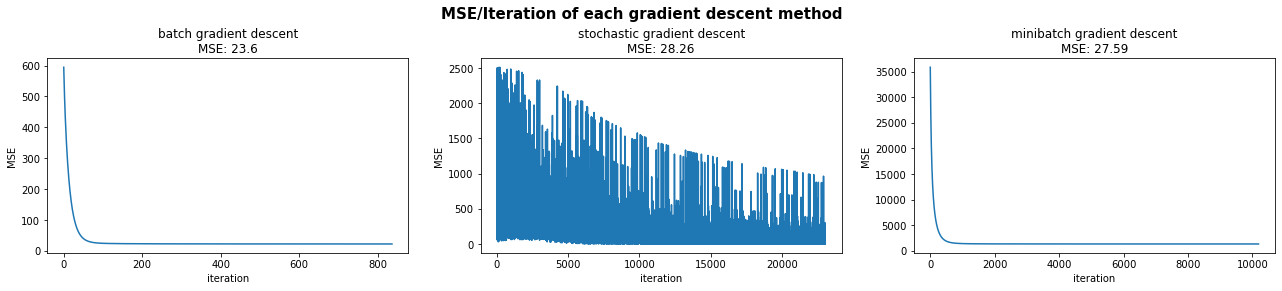

In [342]:
fig,axes = plt.subplots(1,3, figsize = (22,4))
x_plot1 = np.arange(0, len(model1.mse_record[2:]) )
x_plot2 = np.arange(0, len(model2.mse_record[2:]) )
x_plot3 = np.arange(0, len(model3.mse_record[2:]) )

axes[0].plot(x_plot1, model1.mse_record[2:])
axes[1].plot(x_plot2, model2.mse_record[2:])
axes[2].plot(x_plot3, model3.mse_record[2:])

axes[0].set_title(f'batch gradient descent\nMSE: {round(mse1,2)}')
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('iteration')

axes[1].set_title(f'stochastic gradient descent\nMSE: {round(mse2,2)}')
axes[1].set_ylabel('MSE')
axes[1].set_xlabel('iteration')

axes[2].set_title(f'minibatch gradient descent\nMSE: {round(mse3,2)}')
axes[2].set_ylabel('MSE')
axes[2].set_xlabel('iteration')

fig.suptitle('MSE/Iteration of each gradient descent method', size = 15, weight= 'bold')
plt.subplots_adjust(top=0.8)
plt.show()

In [345]:
model2.theta

array([20.18661625, -0.81129187,  0.66750108, -0.74398898,  1.34926209,
       -0.26506435,  2.7441875 , -0.03736039, -1.5173578 ,  0.79473432,
       -0.33870658, -1.5553305 ,  1.09034726, -3.22887796])

In [336]:
model1.theta

array([22.54948124, -0.96759452,  1.49406712, -0.0930789 ,  0.74825552,
       -2.19178646,  2.04461746,  0.61480148, -3.37917439,  2.77891559,
       -1.55838064, -2.1584802 ,  1.23650148, -4.34281746])

In [337]:
model3.theta

array([22.42705979, -0.1648793 ,  0.50253449,  0.63675177,  0.32124965,
       -2.11649052,  1.25558655, -0.83050353, -3.72728571,  3.02274469,
       -1.28773527, -3.31788169,  1.47140047, -5.81310241])